## Function Approximation
### Using the PSO algorithm to optimise the ANN's parameters

**1. Import Resources**

In [1]:
# import resources
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**2. Create Neural Network Class**

In [2]:
class NeuralNetwork:    
    def __init__(self, func, hiddenLayerNeurons, activation):
        self.func = func # name of the function to be optimized
        self.layerArch = list.copy(hiddenLayerNeurons) #list of neurons in the hidden layers
        self.activation = activation # name of the activation fuction
         
        # adding input and output layers to the hidden neurons list
        self.inputOutputNeurons()
        
        # calculate number of weights
        self.nWeights = self.numWeights()
        
        # set activation function
        self.actFunc = self.functionSelection()
        
        # set indices at which weight matrix to be split for matrix multiplication
        self.splitIndices = self.splitIndices()
        
    def getANN_Hyperparameters(self):
        return [self.func, self.activation, self.layerArch]
        
    def getnWeights(self): # getter methonds for number of weights
        return self.nWeights
        
    def inputOutputNeurons(self): # a private method to neuralNetwork class
        # Set number neurons in the Input layer
        if self.func in ('XOR','Complex'):
            self.layerArch.insert(0,2) # XOR & Complex functions are based on two input variables
        else:
            self.layerArch.insert(0,1) # Linear, Cubic, Sine, Tanh functions are based on single input variable
       
        # Set number of neurons in the Output layer
        self.layerArch.append(1) # only single output value is expected from the fuction
        
    def numWeights(self):# a private method to neuralNetwork class
        n_weights = sum(self.layerArch[i]*self.layerArch[i+1] for i in range(len(self.layerArch)-1))
        return n_weights
    
    def functionSelection(self):# a private method to neuralNetwork class
        return activation_funcs[self.activation]
    
    def splitIndices(self):
        indices = []
        for i in range(len(self.layerArch)-1):
            indices.append(self.layerArch[i]*self.layerArch[i+1])

        splitIndices = []
        splitIndices.append(indices[0])
        for j in range(1,len(indices)-1):
            splitIndices.append(splitIndices[j-1] + indices[j])

        return splitIndices
    
    def forward(self, weights,X,Y):
        
        inputArray = np.copy(X)
       
        wArray = np.split(weights,self.splitIndices)
        #print("splitIndices",self.splitIndices)
        #print("wArray",wArray)
        #print("layerArch", self.layerArch)
        
        wMatrix=[]
        for i in range(0,len(self.layerArch)-1):
            wMatrix.append(wArray[i].reshape(self.layerArch[i+1],self.layerArch[i]))
        #print("wArray after reshape", wMatrix)
    
        desiredArray = np.copy(Y)
        predictArray = []
        
        for i in range(len(inputArray)):
            ih = inputArray[i].reshape(-1,1)
            for j in range(0,len(self.layerArch)-1):
                #print("wMatrix = ", wMatrix[j], "ih = ", ih)
                ih = np.matmul(wMatrix[j],ih)
            
                if j != (len(self.layerArch)-1):
                    ih = self.actFunc(ih)
            predictArray.append(ih)
            
        #print(len(desiredArray), len(predictArray))

        squeezePredict = np.squeeze(predictArray)

        mse = ((desiredArray - squeezePredict)**2).mean(axis = None)
       
        return mse.tolist(), squeezePredict

**3. Helper function for passing activation function**

In [3]:
activation_funcs = {
    'Null': lambda x: x*0,
    'Sigmoid': lambda x: 1/(1 + np.exp(-x)),
    'Hyperbolic Tangent': lambda x: np.tanh(x),
    'Cosine': lambda x: np.cos(x),
    'Gaussian': lambda x: np.exp(-x**2/2),
        }

**4. Function to read data from the .txt file**

In [4]:
# load the training data from .txt file into a list
def read_data(func):
    txt_address = {'Linear':'Data/1in_linear_test.txt',
                   'Cubic':'Data/1in_cubic_test.txt',
                   'Sine':'Data/1in_sine_test.txt',
                   'TanH':'Data/1in_tanh_test.txt',
                   'XOR':'Data/2in_xor_test.txt',
                   'Complex':'Data/2in_complex_test.txt'}

    train_data_file = open(txt_address[func],'r')
    line_data = train_data_file.readlines()
    train_data_file.close()

    train_list = []
    for line in line_data:
        line = line.strip().split()
        for d in line:
            train_list.append(float(d))
        
    #check     
    #print(train_list)

    if func in ('XOR','Complex'):
        train_array = np.asarray(train_list, dtype=np.float32).reshape(-1,3)
        X,Y = train_array[:,0:2], train_array[:,-1]

    elif func in ('Linear', 'Cubic', 'Sine', 'TanH'):
        train_array = np.asarray(train_list, dtype=np.float32).reshape(-1,2)
        X,Y = train_array[:,0], train_array[:,-1]
    else:
        "error reading data"    
    #print(train_array)
    #print(X)
    #print(Y)
    
    return X,Y

**5. Select function to be Tested**

In [5]:
# Set function from User input
func = input('Choose the function name \n(Options: Linear, Cubic, Sine, TanH, XOR, Complex) = ')

Choose the function name 
(Options: Linear, Cubic, Sine, TanH, XOR, Complex) = Sine


**6. Run Test**

In [6]:
if func == 'Linear':
    hidden_layer_neurons = [10]
    activation = 'Hyperbolic Tangent' 
    weights = np.genfromtxt('linear_weights.csv',delimiter = ',')
elif func == 'Cubic':
    hidden_layer_neurons = [7,7,7]
    activation = 'Hyperbolic Tangent' 
    weights = np.genfromtxt('cubic_weights.csv',delimiter = ',')
elif func == 'Sine':
    hidden_layer_neurons = [7,7]
    activation = 'Hyperbolic Tangent' 
    weights = np.genfromtxt('sine_weights.csv',delimiter = ',')
elif func == 'TanH':
    hidden_layer_neurons = [1]
    activation = 'Hyperbolic Tangent' 
    weights = np.genfromtxt('tanh_weights.csv',delimiter = ',') 
elif func == 'XOR':
    hidden_layer_neurons = [4,4]
    activation = 'Hyperbolic Tangent' 
    weights = np.genfromtxt('xor_weights.csv',delimiter = ',') 
elif func == 'Complex':
    hidden_layer_neurons = [10,10,10]
    activation = 'Cosine' 
    weights = np.genfromtxt('complex_weights.csv',delimiter = ',') 
else: 'function not found'
    
X,Y = read_data(func) # read data
ann_object = NeuralNetwork(func, hidden_layer_neurons, activation) #create instance of neural network
mse, predict_array = ann_object.forward(weights,X,Y) #run ann


**7.Print Result**

Mean Squared Error: 0.0104

Accuracy:98.96%

Predicted Array
 [ 0.82867336 -0.70783013  0.38105623  0.24689832  0.49635618 -0.79502396
  0.74567147  0.86938344  0.19589816  0.79490666 -0.19589816  0.82392176
 -0.61223203  0.77716252 -0.54617091 -0.75678626 -0.3032616  -0.8105504
  0.44274748  0.20034754 -0.44274748 -0.82867336  0.14520426 -0.81349416
 -0.64712312 -0.07079853 -0.74567147 -0.57437197  0.67819706 -0.20034754]

Desired output
 [ 0.826  -0.7765  0.2258  0.1851  0.3445 -0.9074  0.6623  0.9745  0.1238
  0.7499 -0.1446  0.946  -0.6466  0.8696 -0.3823 -0.8485 -0.1438 -0.9317
  0.2857  0.1035 -0.2651 -0.8136  0.0621 -0.776  -0.6926 -0.0203 -0.646
 -0.5981  0.5645 -0.0822]


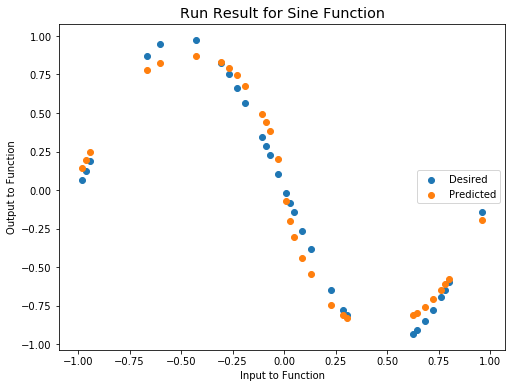

In [7]:
#Print Result
print('Mean Squared Error: {:0.4f}'.format(mse))
accu = (1-mse)*100
print('\nAccuracy:{:0.2f}%'.format(accu))
print("\nPredicted Array\n",predict_array)
print("\nDesired output\n",Y)
#print("\nInput from test file\n",X)
#print("\nTrained weights used:\n",weights)


# Graph between Desired vs Predicted (for single input equation only)
if func in ['Linear', 'Cubic', 'Sine', 'TanH']:
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y, marker = 'o',label='Desired')
    plt.scatter(X,predict_array, marker = 'o',label='Predicted')
    plt.ylabel('Output to Function')
    plt.xlabel('Input to Function')

    title_string = 'Run Result for {} Function'.format(func)

    #plt.legend(title='Parameter where:')
    plt.legend(loc='center right', shadow=False, fontsize='medium')
    plt.title(title_string,fontsize='x-large')